In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv("LEC01_Advertising.csv", index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Alpha (Slope): 1.3878410914927763
Beta (Intercept): -172.08095906902088
R-squared: 0.9846347843330978


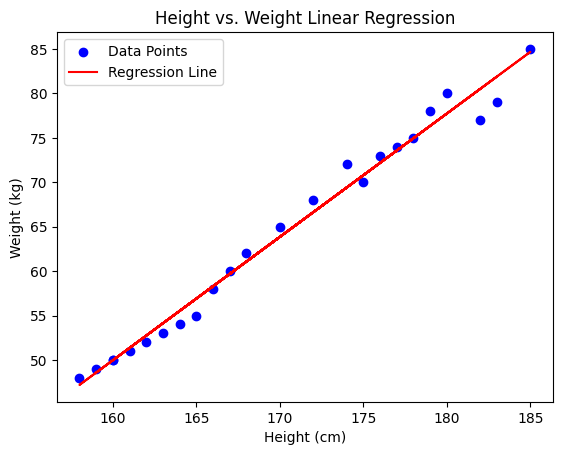

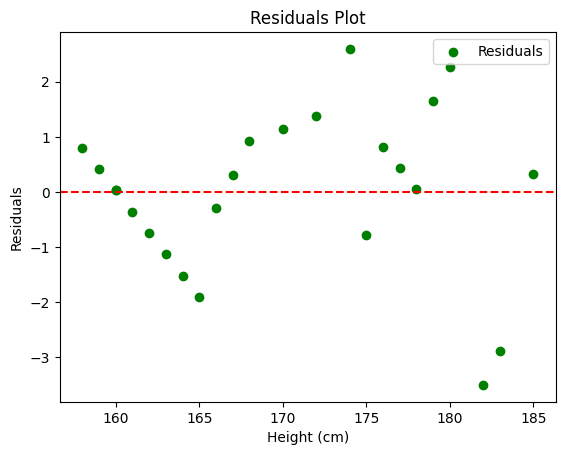

In [6]:
import statsmodels.api as sm
data = {
    "Name": ["Tom", "Erik", "Alicia", "Lisa", "John", "Sarah", "Michael", "Laura", "Kevin", "Emma",
             "Brian", "Karen", "Chris", "Nancy", "Jeff", "Maria", "Jason", "Carol", "David", "Michelle",
             "Adam", "Emily", "Richard", "Jessica"],
    "Height": [180, 175, 165, 167, 170, 160, 185, 168, 172, 158, 178, 162, 174, 164, 176, 166, 182, 160, 177, 163,
               179, 159, 183, 161],
    "Weight": [80, 70, 55, 60, 65, 50, 85, 62, 68, 48, 75, 52, 72, 54, 73, 58, 77, 50, 74, 53, 78, 49, 79, 51]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Prepare the data for linear regression
X = df["Height"]
y = df["Weight"]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the parameters
alpha = model.params["Height"]
beta = model.params["const"]

# Calculate R-squared
r_squared = model.rsquared

# Print the parameters and R-squared
print("Alpha (Slope):", alpha)
print("Beta (Intercept):", beta)
print("R-squared:", r_squared)

# Plotting the data and regression line
plt.scatter(df["Height"], df["Weight"], color="blue", label="Data Points")
plt.plot(df["Height"], model.predict(X), color="red", label="Regression Line")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height vs. Weight Linear Regression")
plt.legend()
plt.show()

# Calculate and plot residuals
residuals = y - model.predict(X)
plt.scatter(df["Height"], residuals, color="green", label="Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Height (cm)")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.legend()
plt.show()

In [ ]:
# Sample data
heights = [180, 175, 165, 167, 170, 160, 185, 168, 172, 158, 178, 162, 174, 164, 176, 166, 182, 160, 177, 163,
           179, 159, 183, 161]
weights = [80, 70, 55, 60, 65, 50, 85, 62, 68, 48, 75,
           52, 72, 54, 73, 58, 77, 50, 74, 53, 78, 49, 79, 51]

# Function to calculate alpha (slope)


def calculate_alpha(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(xi * yi for xi, yi in zip(x, y))
    sum_x_squared = sum(xi**2 for xi in x)
    numerator = n * sum_xy - sum_x * sum_y
    denominator = n * sum_x_squared - sum_x**2
    alpha = numerator / denominator
    return alpha

# Function to calculate beta (intercept)


def calculate_beta(x, y, alpha):
    n = len(x)
    sum_y = sum(y)
    sum_x = sum(x)
    sum_x_squared = sum(xi**2 for xi in x)
    sum_xy = sum(xi * yi for xi, yi in zip(x, y))
    numerator = (sum_y * sum_x_squared) - (sum_x * sum_xy)
    denominator = n * sum_x_squared - sum_x**2
    beta = numerator / denominator
    return beta

# Function to calculate R-squared


def calculate_r_squared(x, y, alpha, beta):
    y_mean = sum(y) / len(y)
    ss_total = sum((yi - y_mean)**2 for yi in y)
    ss_residual = sum((yi - (alpha * xi + beta))**2 for xi, yi in zip(x, y))
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared


# Calculate alpha, beta, and R-squared
alpha = calculate_alpha(heights, weights)
beta = calculate_beta(heights, weights, alpha)
r_squared = calculate_r_squared(heights, weights, alpha, beta)

# Print results
print("Alpha (Slope):", alpha)
print("Beta (Intercept):", beta)
print("R-squared:", r_squared)